## In this notebook we are going to Predict the Growth of Amazon Stock using Linear Regression Model and CRISP-DM.

In [150]:
#importing the libraries
import numpy as np
import pandas as pd
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data Understanding

The data is already processed to price-split values so it is easy to analysis but we are creating new tables to optimize our model

In [151]:
#importing Price Split Data
data = pd.read_csv('prices-split-adjusted.csv')

In [152]:
data

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [153]:
#checking data for null values
data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

#### There are no null values in the Data table we are going to create

# Data Preprocessing

Creating Table for a specific Stock

In [154]:
#Initializing the Dataset for the Stock to be Analysized
data = data.loc[(data['symbol'] == 'AMZN')]
data = data.drop(columns=['symbol'])
data = data[['date', 'open', 'close', 'low', 'volume', 'high']]
data

,date,open,close,low,volume,high
284,2010-01-04,136.250000,133.899994,133.139999,7599900.0,136.610001
751,2010-01-05,133.429993,134.690002,131.809998,8851900.0,135.479996
1219,2010-01-06,134.600006,132.250000,131.649994,7178800.0,134.729996
1687,2010-01-07,132.009995,130.000000,128.800003,11030200.0,132.320007
2155,2010-01-08,130.559998,133.520004,129.029999,9830500.0,133.679993
...,...,...,...,...,...,...
848799,2016-12-23,764.549988,760.590027,757.989990,1976900.0,766.500000
849299,2016-12-27,763.400024,771.400024,761.200012,2627400.0,774.650024
849799,2016-12-28,776.250000,772.130005,770.500000,3279100.0,780.000000
850299,2016-12-29,772.400024,765.150024,760.849976,3153500.0,773.400024


In [155]:
#Number of rows and columns we are working with
data.shape

(1762, 6)

Ploting the closing price of the Stock

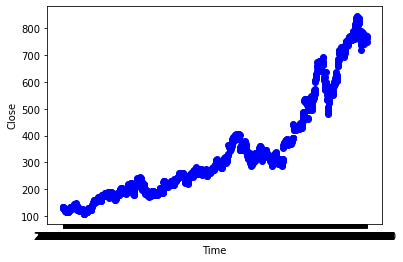

In [156]:
plt.scatter(data.date, data.close, color='blue')
plt.xlabel("Time")
plt.ylabel("Close")
plt.show()

### Here we can see that the Stock is growing in Long-Term with multiple medium downfall which are acceptable
So it is good for Long-term investing

In [157]:
#For plotting against time
data['date'] = pd.to_datetime(data.date)

<AxesSubplot:>

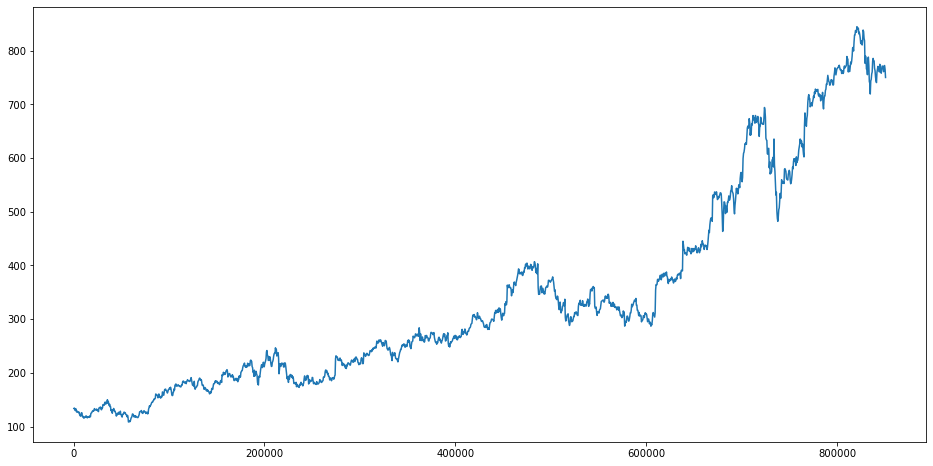

In [158]:
#Plot for close values on each date
data['close'].plot(figsize=(16, 8))

# Linear Regression

Here we are going to use LR to make simple prediction of the stock value change. We are checking for accuracy on a particular Stock.

In [159]:
x1 = data[['open', 'high', 'low', 'volume']]
y1 = data['close']

In [160]:
#Making test and train datasets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state = 0)

In [161]:
x1_train.shape

(1321, 4)

In [162]:
x1_test.shape

(441, 4)

In [163]:
#Initailizing LinearRegression
regression = LinearRegression()

In [164]:
regression.fit(x1_train, y1_train)

LinearRegression()

In [165]:
print(regression.coef_)

[-5.87925894e-01  8.28276131e-01  7.59893647e-01  8.34445879e-09]


In [166]:
print(regression.intercept_)

-0.12697375175366687


In [167]:
predicted = regression.predict(x1_test)

In [168]:
#Predictions for Stock values
print(x1_test)

              open        high         low     volume
554898  334.679993  337.160004  334.019989  1810500.0
313942  245.789993  247.500000  243.119995  2929700.0
193622  182.830002  184.199997  177.100006  5313700.0
262242  192.500000  194.279999  191.259995  4214400.0
642952  424.149994  428.500000  422.850006  2766100.0
...            ...         ...         ...        ...
435392  284.589996  284.869995  280.000000  1534700.0
45228   117.900002  124.970001  117.519997  7966900.0
361608  269.369995  276.649994  269.369995  3417000.0
83686   148.899994  148.979996  146.500000  7259600.0
50856   120.309998  121.470001  117.360001  7369200.0

[441 rows x 4 columns]


In [169]:
predicted.shape

(441,)

# Evaluation of the model

Making table for Actual price and Predicted Price

In [170]:
dframe = pd.DataFrame(y1_test, predicted)
dfr = pd.DataFrame({'Actual_Price':y1_test, 'Predicted_Price':predicted})
print(dfr)

        Actual_Price  Predicted_Price
554898    335.779999       336.202351
313942    243.919998       245.134854
193622    177.539993       179.572504
262242    191.729996       192.987200
642952    426.880005       426.764699
...              ...              ...
435392    280.980011       281.289243
45228     122.720001       123.435410
361608    273.459991       275.367079
83686     148.320007       147.112436
50856     117.910004       118.992977

[441 rows x 2 columns]


In [171]:
#Actual values vs Predicted Values 
dfr.head(10)

,Actual_Price,Predicted_Price
554898,335.779999,336.202351
313942,243.919998,245.134854
193622,177.539993,179.572504
262242,191.729996,192.987200
642952,426.880005,426.764699
632578,381.200012,380.370453
513738,329.320007,334.215213
473558,402.200012,402.743649
813299,761.090027,764.124162
850799,749.869995,753.512270


In [172]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [173]:
#Regrssion Score Analysis
regression.score(x1_test, y1_test)

0.9998720658993017

In [174]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, predicted)))

Mean Absolute Error: 1.5453937749166724
Mean Squared Error: 4.573651073481705
Root Mean Squared Error: 2.1386096122204505


In [175]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  100.03027820524657


# Deploying the model by visualization

### Plotting Acutal Close values vs Predicted Values in LR Model

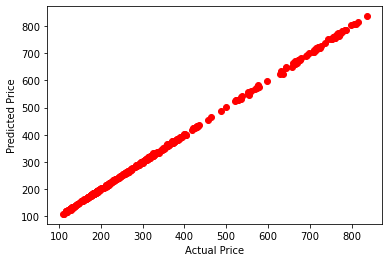

In [176]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.show()

We can see that using simple Linear Regression on a Scalar and Linear entity as Stock Price over a period of time gives a simple and straight line. Stating that the stock is growing over time. So now we are some what confident in investing in this stock. To better understand next we are using LSTM model.